### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

import warnings
warnings.filterwarnings("ignore")

import re
import time
import random
import tempfile
from tqdm.notebook import tqdm

import gc
gc.collect()

616

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the data from csv

#### Reading Training data

In [5]:
df_training_data = pd.read_csv("../data/train.csv")
df_training_data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


#### Reading Testing data

In [6]:
df_test_data = pd.read_csv("../data/test.csv")
df_test_data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


### Data Exploration

In [7]:
# checking the shape of data
print("Training data shape [rows, columns]:", df_training_data.shape)
print("Test data shape [rows, columns]:", df_test_data.shape)

Training data shape [rows, columns]: (100000, 28)
Test data shape [rows, columns]: (50000, 27)


In [8]:
#column information
display(
    print("Training Data Column Information:"),
    print(df_training_data.info()),
    print("\n\nTest Data Column Information:"),
    print(df_test_data.info())
)

Training Data Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loa

None

None

None

None

#### statistical summary of numeric features

In [9]:
display(
    print("Training Data - Statistical Summary of Numeric columns:"),
    df_training_data.describe().T,
    print("\n\nTest Data - Statistical Summary of Numeric columns:"),
    df_test_data.describe().T
)

Training Data - Statistical Summary of Numeric columns:


Test Data - Statistical Summary of Numeric columns:


None

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


None

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,42502.0,4182.004291,3174.109304,303.645417,1625.188333,3086.305000,5934.189094,15204.633333
Num_Bank_Accounts,50000.0,16.838260,116.396848,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,50000.0,22.921480,129.314804,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,50000.0,68.772640,451.602363,1.000000,8.000000,13.000000,20.000000,5799.000000
Delay_from_due_date,50000.0,21.052640,14.860397,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,48965.0,30.080200,196.984121,0.000000,4.000000,7.000000,10.000000,2593.000000
Credit_Utilization_Ratio,50000.0,32.279581,5.106238,20.509652,28.061040,32.280390,36.468591,48.540663
Total_EMI_per_month,50000.0,1491.304305,8595.647887,0.000000,32.222388,74.733349,176.157491,82398.000000


#### statistical summary of non-numeric features

In [10]:
display(
    print("Training Data - Statistical Summary of Non-numeric columns:"),
    df_training_data.describe(exclude=np.number).T,
    print("\n\nTest Data - Statistical Summary of Numeric columns:"),
    df_test_data.describe(exclude=np.number).T
)

Training Data - Statistical Summary of Non-numeric columns:


Test Data - Statistical Summary of Numeric columns:


None

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


None

,count,unique,top,freq
ID,50000,50000,0x160a,1
Customer_ID,50000,12500,CUS_0xd40,4
Month,50000,4,September,12500
Name,44985,10139,Stevex,22
Age,50000,976,39,1493
SSN,50000,12501,#F%$D@*&8,2828
Occupation,50000,16,_______,3438
Annual_Income,50000,16121,109945.32,8
Num_of_Loan,50000,263,2,7173
Type_of_Loan,44296,6260,Not Specified,704


#### check missing values

In [11]:
# checking column names mismatch in training & test data
(df_training_data.columns[:-1]!=df_test_data.columns).sum()

0

In [12]:
# concat training & test (later it can be split against nulls in target variable)
df = pd.concat([df_training_data, df_test_data], ignore_index=True)
df.shape

(150000, 28)

In [13]:
# nulls in target variable
df['Credit_Score'].isna().sum()

50000

In [14]:
# nulls in complete dataset
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit            0
Num_Credit_Inquiries         3000
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour               0
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

In [15]:
# check for duplicate records
df.duplicated().sum()

0

<AxesSubplot:xlabel='Month', ylabel='count'>

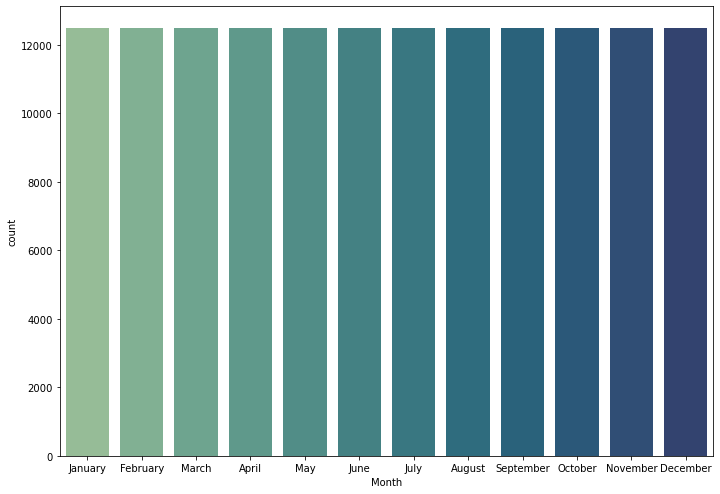

In [16]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.countplot(df['Month'], palette="crest")

In [17]:
# df.columns

cols_countplot = ['Month',
                  'Occupation',
                  'Credit_Mix',
                  'Payment_of_Min_Amount',
                  'Payment_Behaviour',
                  'Credit_Score']
                #   'Type_of_Loan']

# cols_distplot = ['Age',
#              'Annual_Income',
#              'Monthly_Inhand_Salary',
#              'Num_Bank_Accounts',
#              'Num_Credit_Card',
#              'Total_EMI_per_month',
#              'Amount_invested_monthly',
#              'Monthly_Balance',
#              'Outstanding_Debt'
#              ]

cols_distplot = [
             'Monthly_Inhand_Salary',
             'Num_Bank_Accounts',
             'Num_Credit_Card',
             'Total_EMI_per_month'
             ]

Countplot for Month

Countplot for Occupation

Countplot for Credit_Mix

Countplot for Payment_of_Min_Amount

Countplot for Payment_Behaviour

Countplot for Credit_Score



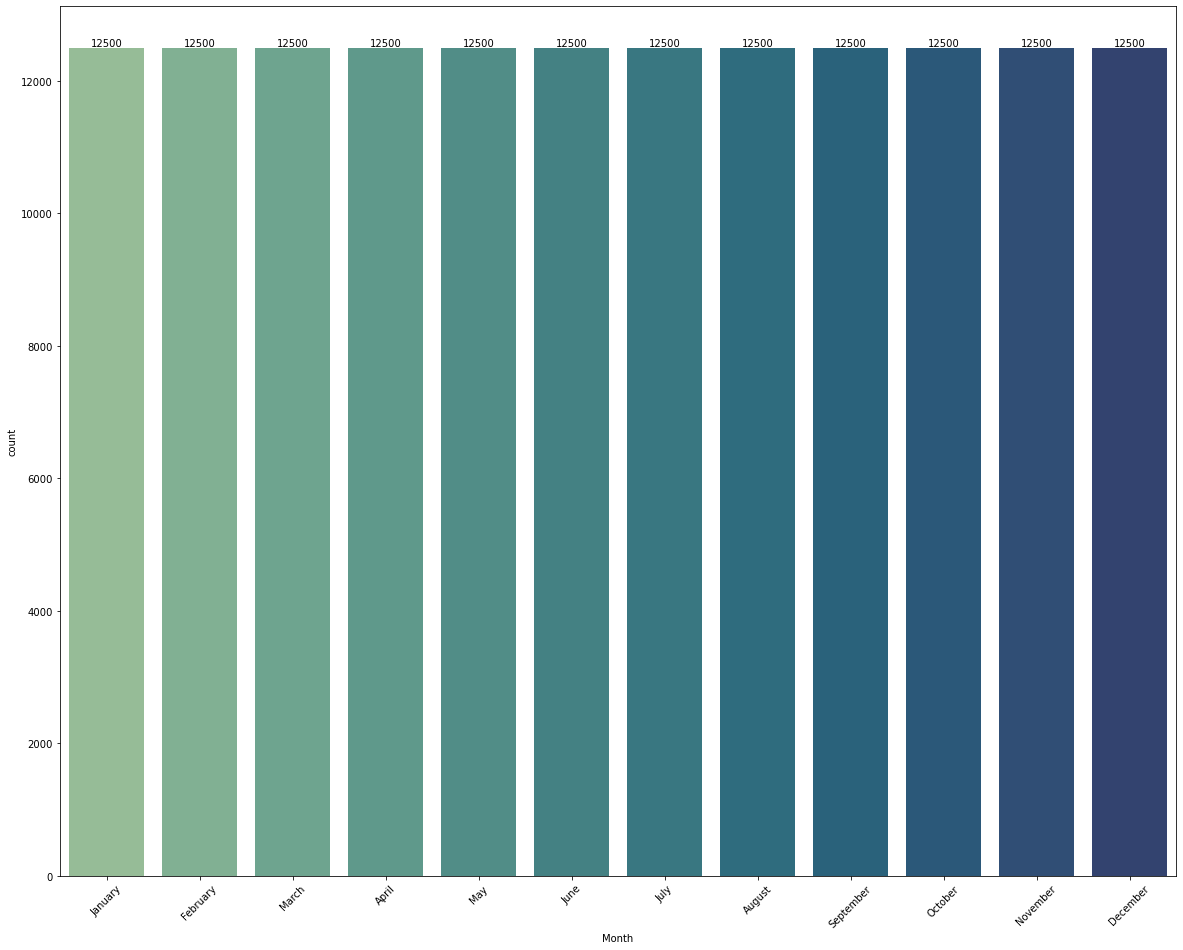

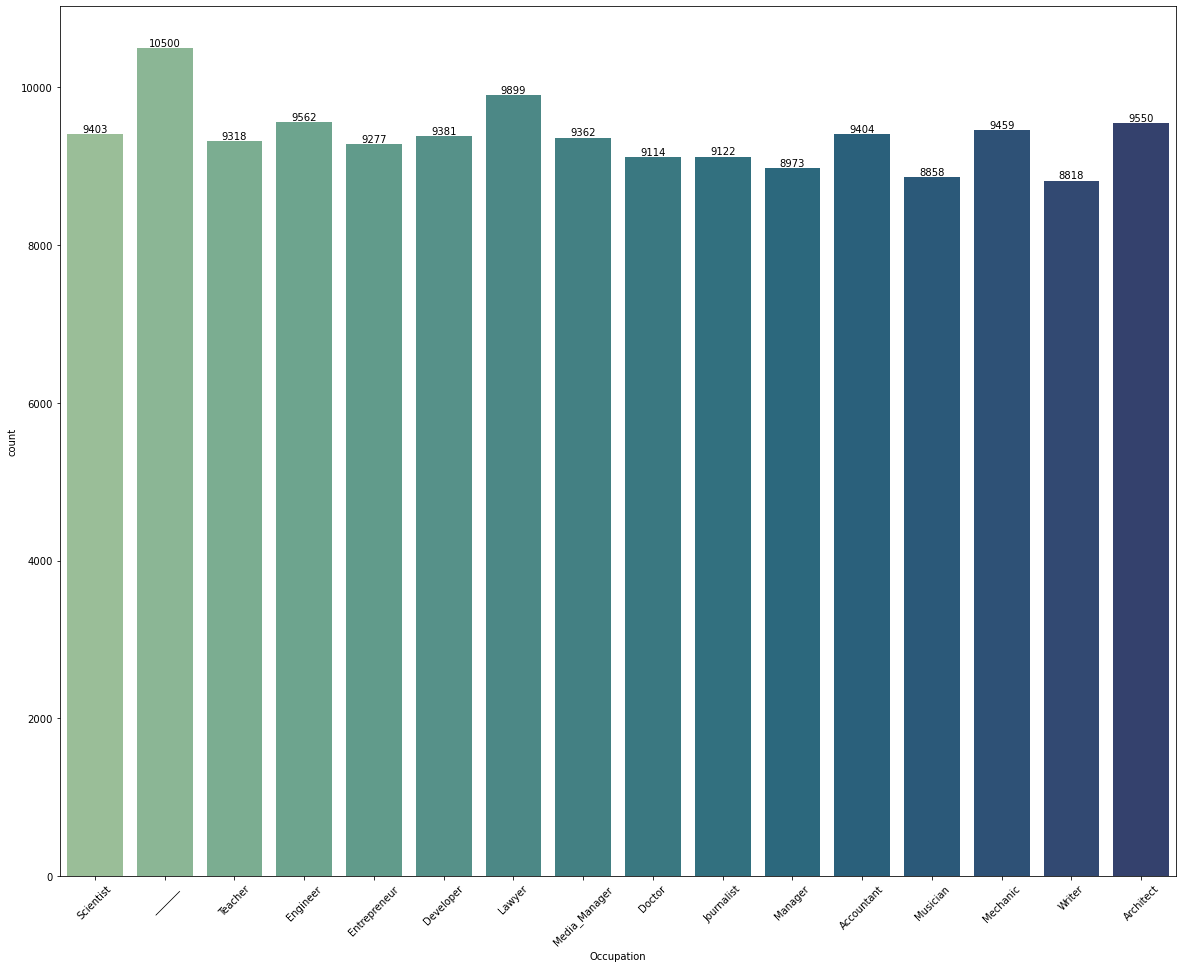

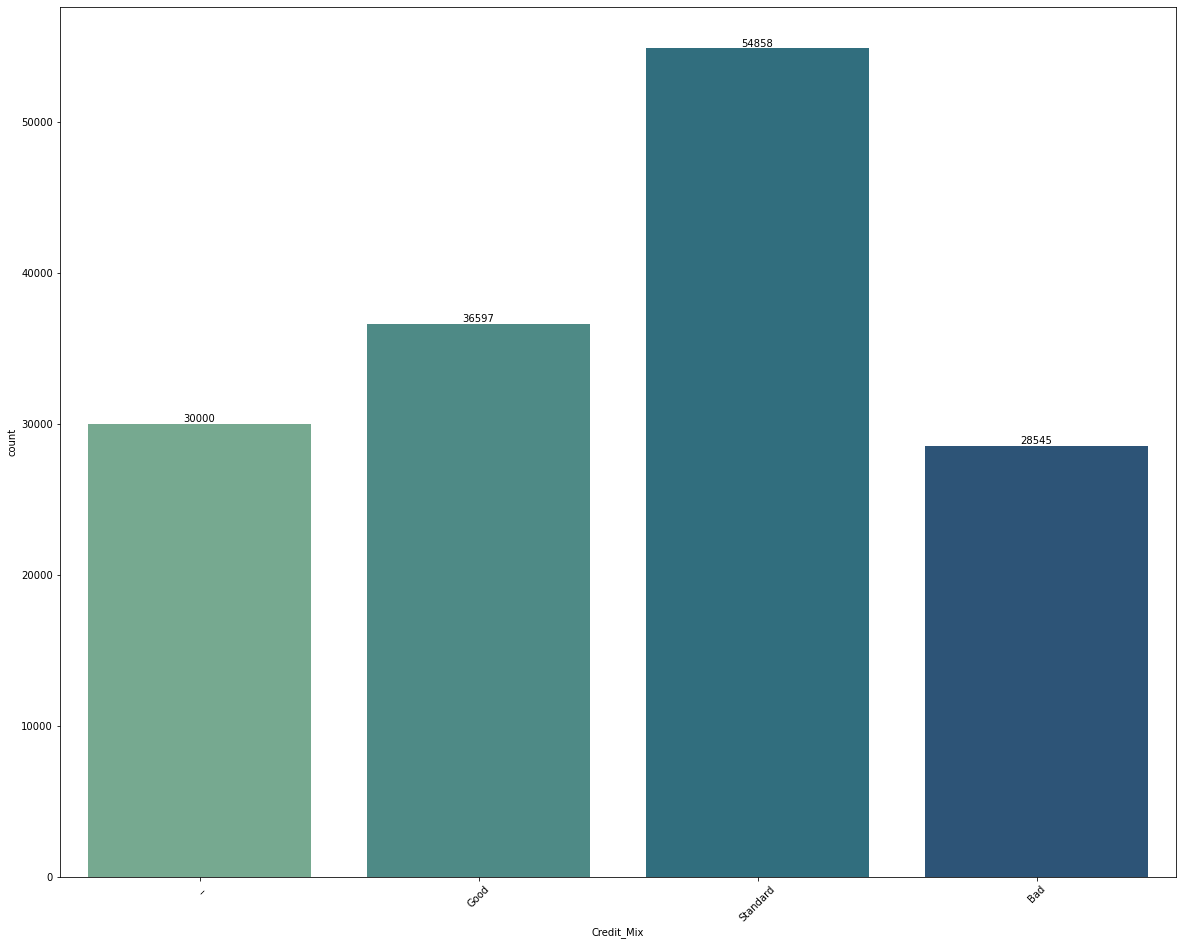

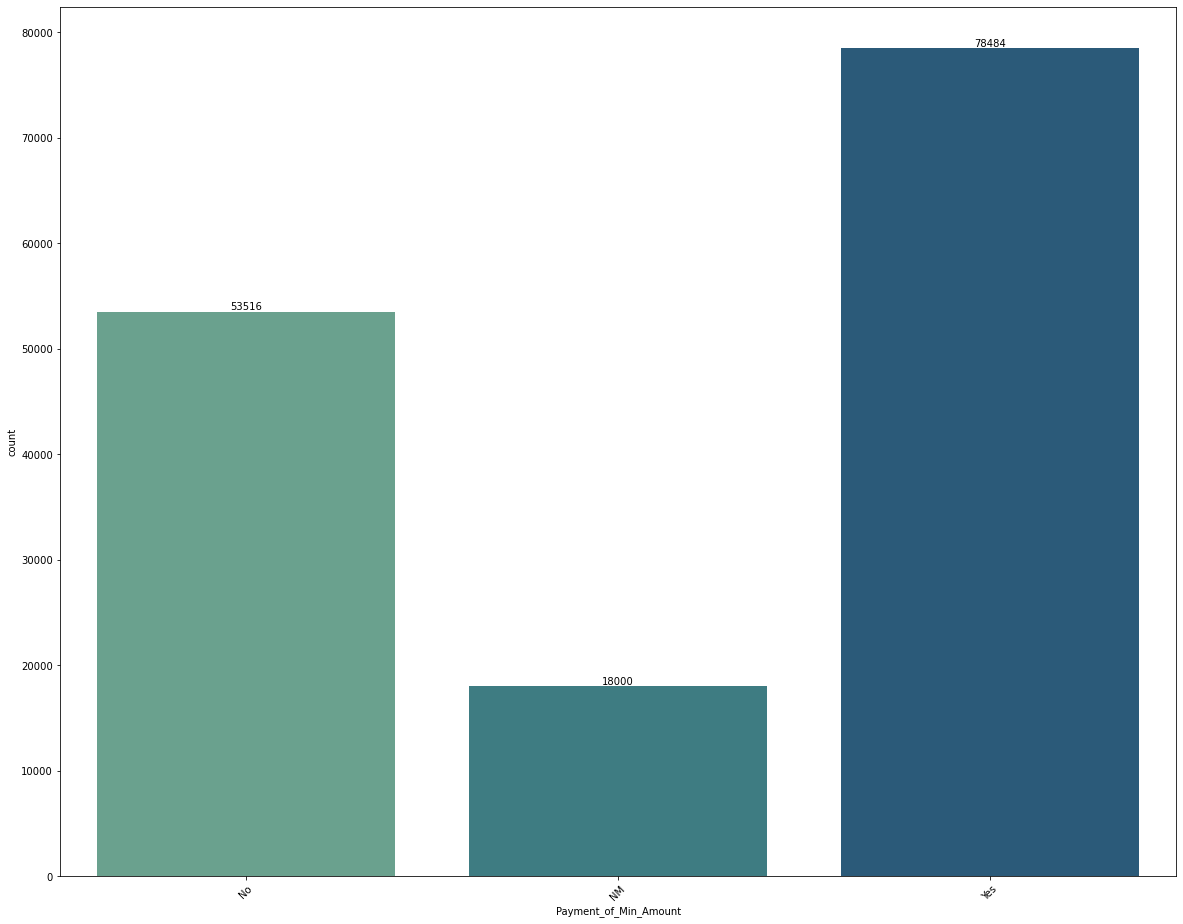

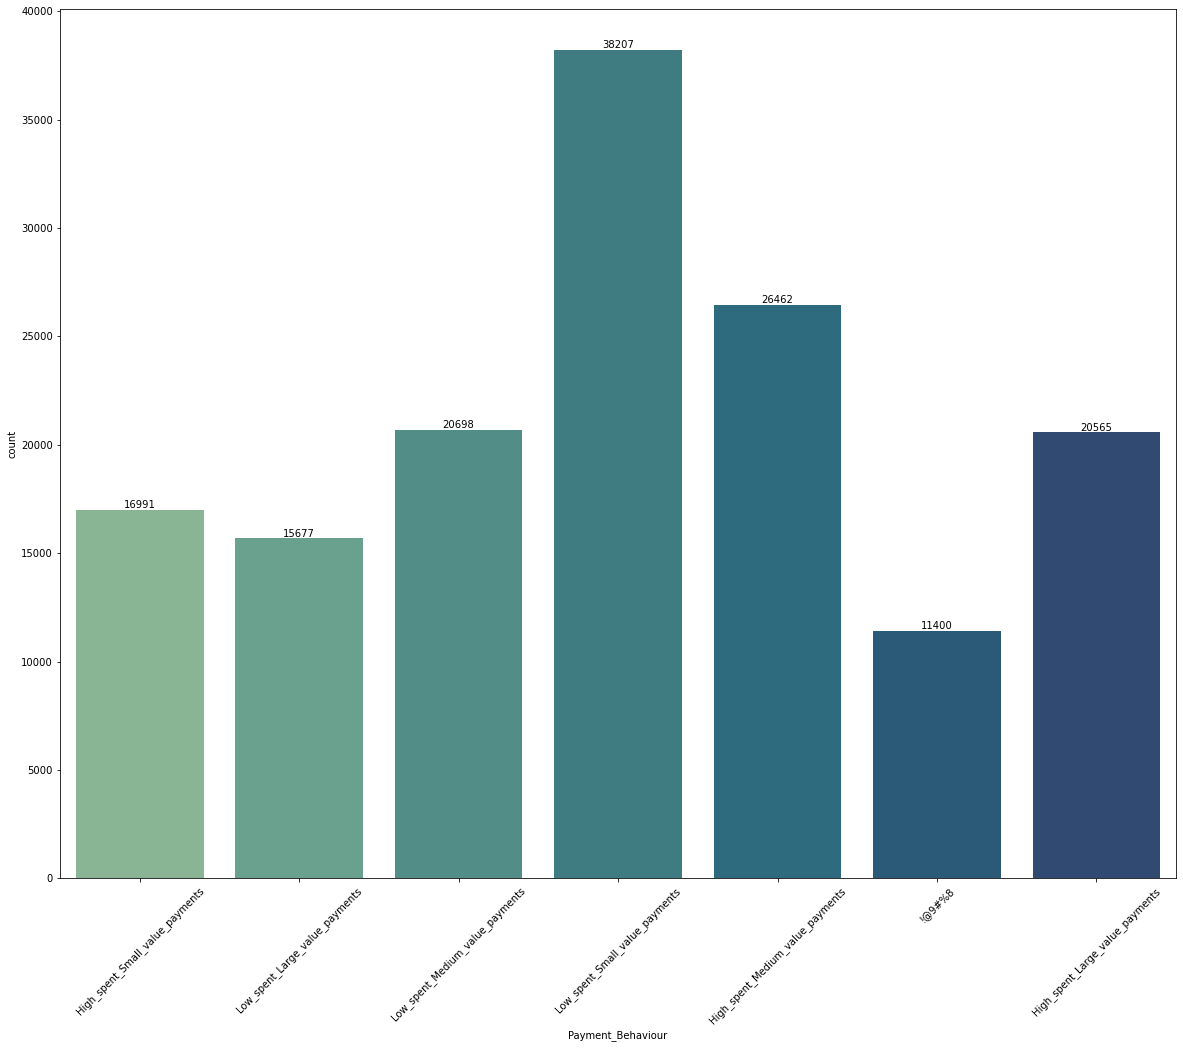

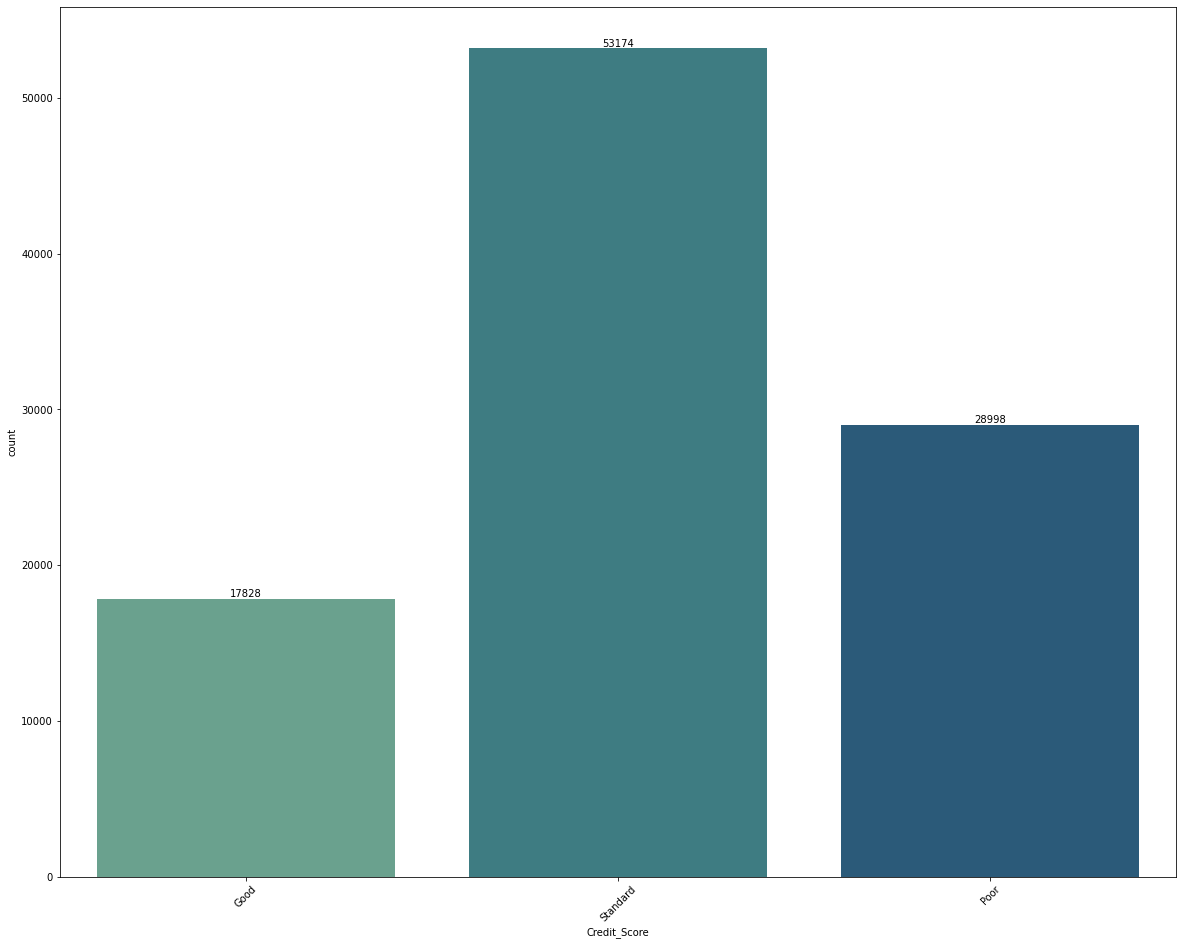

In [18]:
for col in cols_countplot:
    print("Countplot for {}\n".format(col))
    fig, ax = plt.subplots(figsize=(20,16))
    ax = sns.countplot(df[col], palette="crest")
    ax.bar_label(ax.containers[0])
    plt.xticks(rotation=45)

In [19]:
df['Credit_Utilization_Ratio'].value_counts()

26.822620    1
39.377219    1
40.565631    1
41.255522    1
33.638208    1
            ..
26.650258    1
23.864244    1
29.638130    1
31.875399    1
34.108530    1
Name: Credit_Utilization_Ratio, Length: 150000, dtype: int64

Distplot for Monthly_Inhand_Salary

Distplot for Num_Bank_Accounts

Distplot for Num_Credit_Card

Distplot for Total_EMI_per_month



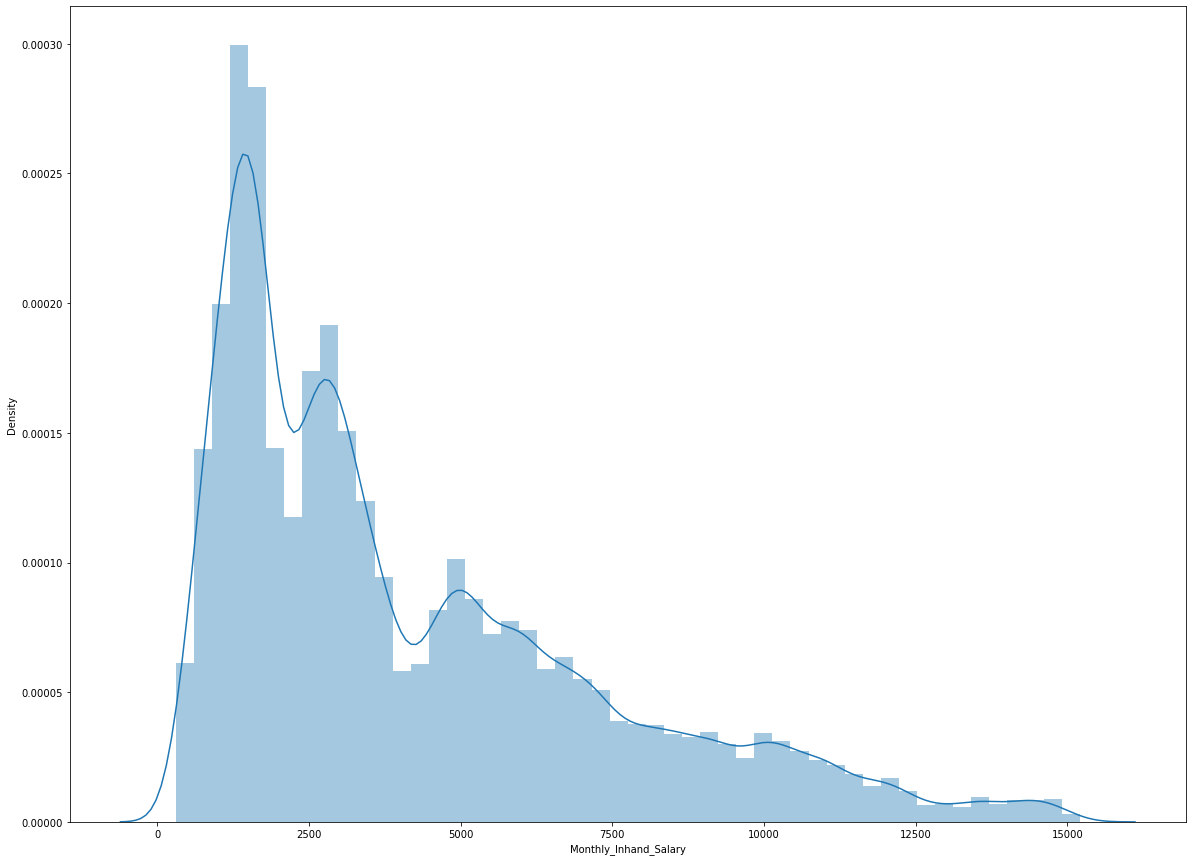

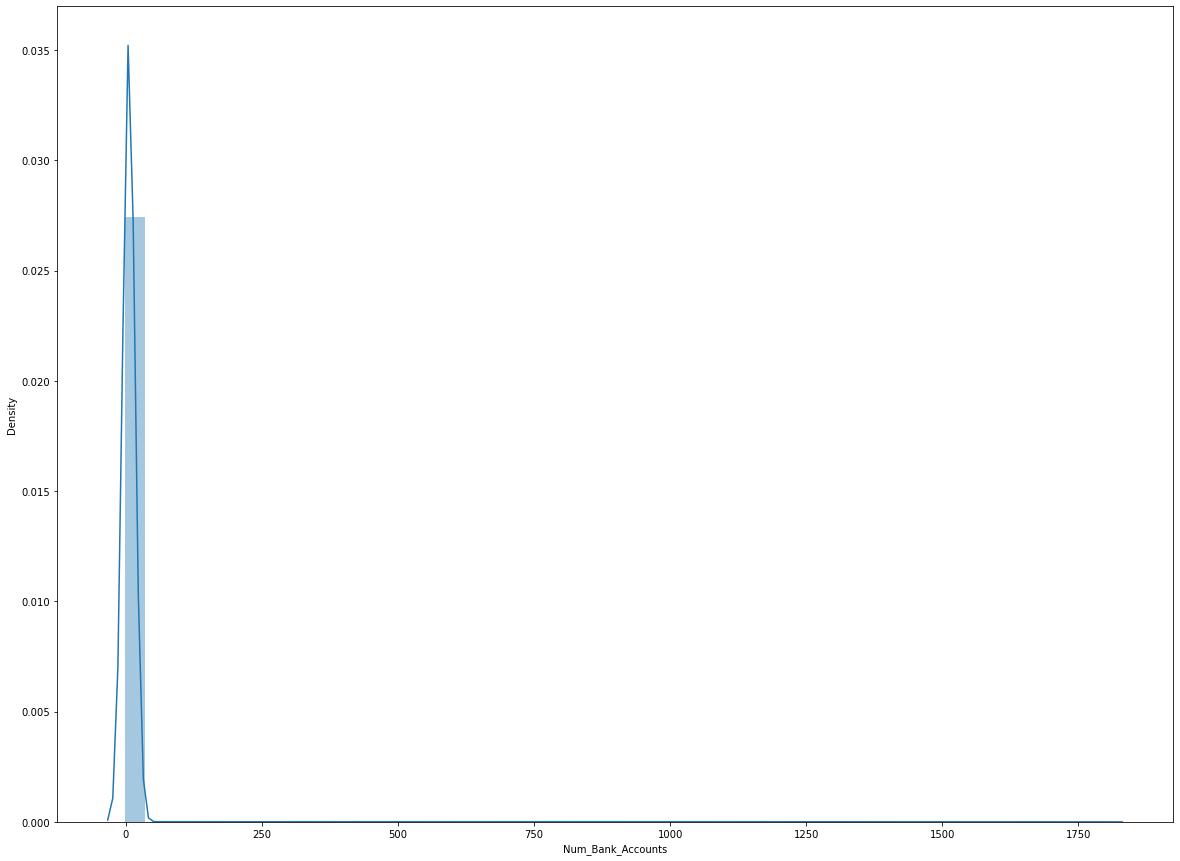

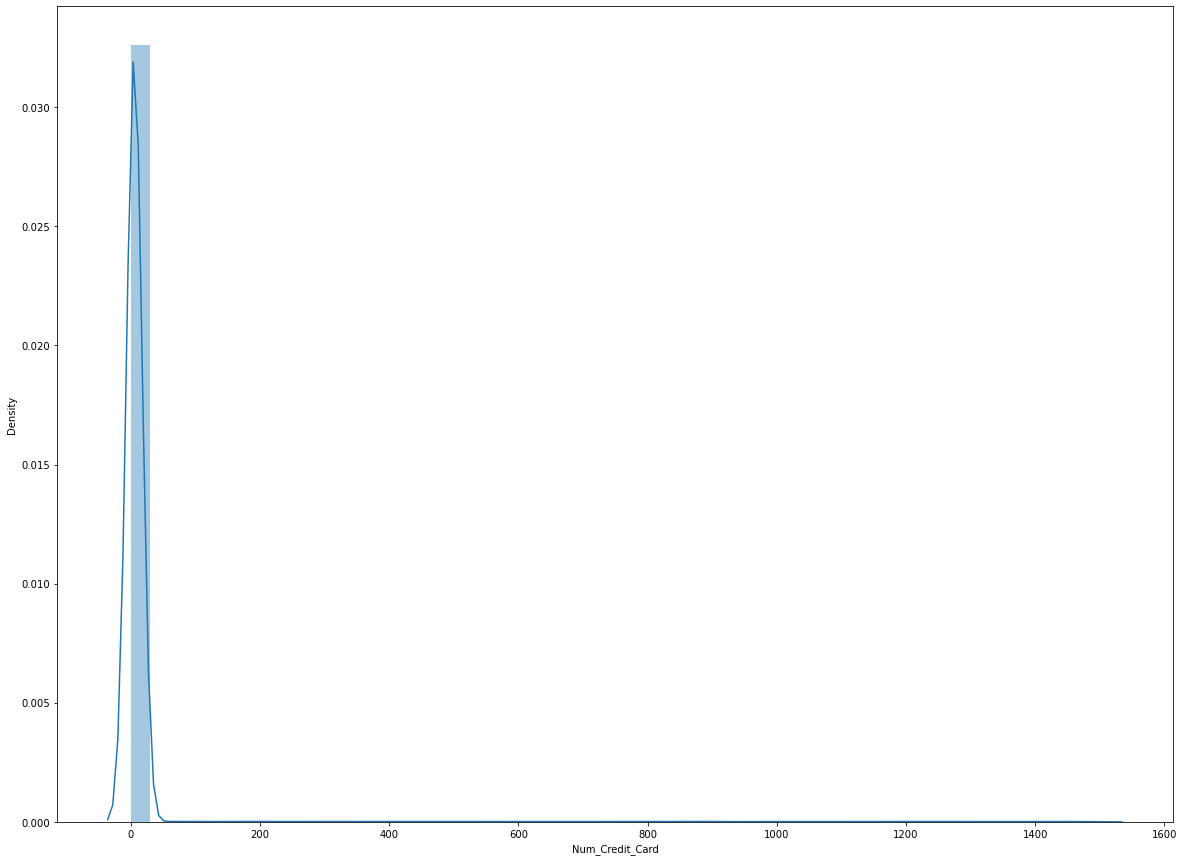

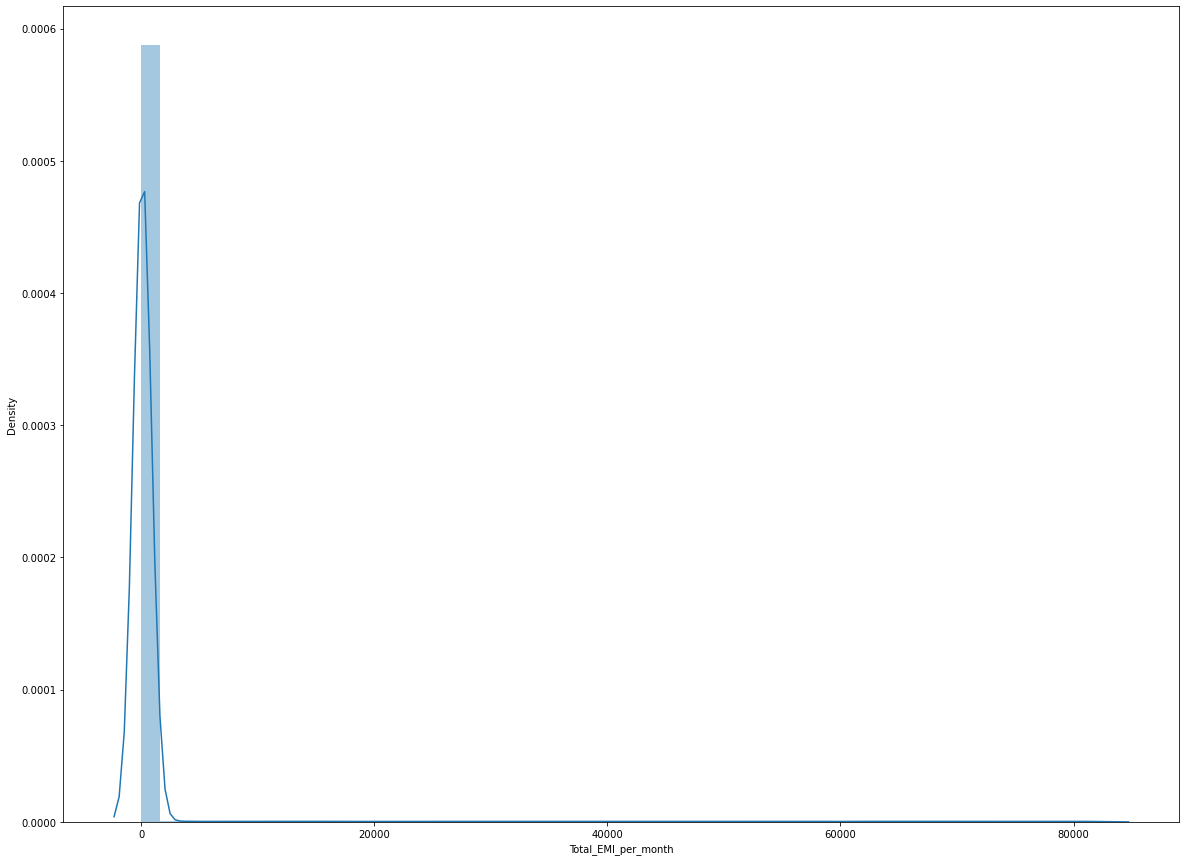

In [20]:
for col in cols_distplot:
    print("Distplot for {}\n".format(col))
    fig, ax = plt.subplots(figsize=(20,15))
    try:
        sns.distplot(df[col])
    except Exception as e:
        continue

In [21]:
# fig, ax = plt.subplots(figsize=(20,15))
# # sns.histplot(df['Age'],bins=5)
# plt.hist(df['Age'])

### Data Issues ...

## Data Cleaning

### Remove un-useful features from the data

In [22]:
del df['ID']
del df['SSN']
del df['Name']

In [23]:
df.shape

(150000, 25)

#### Fix Numerical Columns 

1. replace _  
2. convert into float 

**Age**, **Annual_Income**, **Num_of_Loan**, **Num_of_Delayed_Payment**, **Changed_Credit_Limit**, **Amount_invested_monthly**, **Outstanding_Debt**, **Monthly_Balance**

In [24]:
Num_Cols_to_fix = ['Age',
            'Annual_Income',
            'Num_of_Loan',
            'Num_of_Delayed_Payment',
            'Changed_Credit_Limit',
            'Amount_invested_monthly',
            'Outstanding_Debt',
            'Monthly_Balance']

In [25]:
def fix_numeric_cloumns(column):
    try : 
        return float(column.replace("_",""))
    except :
        return np.nan

In [26]:
for col in Num_Cols_to_fix :
    df[col] = df[col].apply(fix_numeric_cloumns)

**Type of Loan** has 6260 unique values. Too High!!!

Create the main categories as variables, and then set values True/False based on if the loan is part of that categry.

In [27]:
df.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [28]:
# for i in df['Type_of_Loan'].head(10).index[1:]:
#     print(i)
# df['Type_of_Loan'].value_counts().head(9).index[1:]

In [29]:
## Rebuild Type of loans Columns 
for i in df['Type_of_Loan'].value_counts().head(9).index[1:] : 
    df[i] = df['Type_of_Loan'].str.contains(i)

del df['Type_of_Loan']

In [30]:
df.sample(10)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
34640,CUS_0x5a5a,January,19.0,Accountant,64692.70,5150.058333,3,7,5,3.0,...,568.984732,Poor,False,False,False,True,True,False,False,False
74274,CUS_0xc5c9,March,43.0,Accountant,114007.88,9685.656667,7,3,13,4.0,...,501.995198,Standard,False,False,False,True,False,False,True,False
62402,CUS_0x32a9,March,23.0,_______,37679.19,NaN,1,2,12,1.0,...,511.770271,Good,False,False,False,False,False,False,False,False
62294,CUS_0x5474,July,56.0,Engineer,57260.50,4625.708333,1,6,11,1.0,...,621.857857,Good,False,False,False,False,False,False,False,True
32984,CUS_0xa2d2,January,21.0,Lawyer,77818.98,6573.915000,5,6,8,4.0,...,170.824414,Standard,True,False,False,True,False,True,False,False
33267,CUS_0xc461,April,38.0,Scientist,135994.36,11191.863333,8,5,16,2.0,...,881.860896,Poor,False,True,True,False,False,False,False,False
46648,CUS_0x6779,January,15.0,_______,20394.20,1696.516667,4,6,17,5.0,...,271.784451,Standard,False,True,True,False,True,True,False,False
71619,CUS_0x3a43,April,45.0,Engineer,38834.79,3045.232500,0,5,10,-100.0,...,387.754233,Standard,True,False,True,True,False,False,False,False
42139,CUS_0x958b,April,40.0,Accountant,57700.16,4864.346667,8,11,3604,5.0,...,370.964171,Poor,False,False,False,False,True,True,True,True
103498,CUS_0x8962,November,41.0,Lawyer,9542.28,671.190000,6,6,14,4.0,...,286.893138,NaN,False,False,False,False,False,True,False,False


**Num_Bank_Accounts** has negative values, and higher values as well.

A customer having thousands of bank account seems unusual

In [31]:
# df['Num_Bank_Accounts'].sort_values()
df[(df.Num_Bank_Accounts < 0) | (df.Num_Bank_Accounts > 50)].value_counts()

Customer_ID  Month     Age   Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age      Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  Payment_Behaviour                 Monthly_Balance  Credit_Score  Credit-Builder Loan  Personal Loan  Debt Consolidation Loan  Student Loan  Payday Loan  Mortgage Loan  Auto Loan  Home Equity Loan
CUS_0x102d   April     30.0  _______     89064.52       7256.043333            1000               3                1               1.0         6                    5.0                     6.37                  3.0                   Good        648.36            27.812468                 29 Years and 11 Months  NM                     37.572751            488.229282               Low_spent_Medium_value_payments   479.8023

718 customers have less than 0, or more than 50 accounts.

In [32]:
# taking absolute value for all negative data points
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x: abs(x))

**Num_Credit_Card**

In [33]:
# df['Num_Credit_Card'].value_counts().sort_values(ascending=False)
df[(df['Num_Credit_Card']<0)]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan


**Credit_History_Age**

In [34]:
df['Credit_History_Age'].value_counts()

17 Years and 11 Months    628
18 Years and 4 Months     621
18 Years and 3 Months     617
19 Years and 9 Months     615
18 Years and 2 Months     615
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 11 Months     15
34 Years and 0 Months      14
0 Years and 1 Months        2
Name: Credit_History_Age, Length: 408, dtype: int64

Let's convert everything into *Months*

In [35]:
def years_to_months(credit_hist_age):
    try:
        years = int("".join(re.findall('[0-9]',''.join(credit_hist_age.split("and")[0]))))
        months = int("".join(re.findall('[0-9]',''.join(credit_hist_age.split("and")[1]))))
        return years*12 + months
    except:
        return np.nan

In [36]:
test_credit_hist_age = "0 years and 11 months"
print(years_to_months(test_credit_hist_age))

11


In [37]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(years_to_months)

**Payment_of_Min_Amount**

In [38]:
df['Payment_of_Min_Amount'].value_counts()

Yes    78484
No     53516
NM     18000
Name: Payment_of_Min_Amount, dtype: int64

In [39]:
# replace "NM" with "No"
df['Payment_of_Min_Amount'].replace("NM", "No", inplace=True)

df['Payment_of_Min_Amount'].value_counts()

Yes    78484
No     71516
Name: Payment_of_Min_Amount, dtype: int64

**Payment_Behaviour**

In [40]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      38207
High_spent_Medium_value_payments    26462
Low_spent_Medium_value_payments     20698
High_spent_Large_value_payments     20565
High_spent_Small_value_payments     16991
Low_spent_Large_value_payments      15677
!@9#%8                              11400
Name: Payment_Behaviour, dtype: int64

Replace "!@9#%8" with NaN

In [41]:
df['Payment_Behaviour'].replace("!@9#%8", np.nan, inplace=True)

In [42]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      38207
High_spent_Medium_value_payments    26462
Low_spent_Medium_value_payments     20698
High_spent_Large_value_payments     20565
High_spent_Small_value_payments     16991
Low_spent_Large_value_payments      15677
Name: Payment_Behaviour, dtype: int64

**Occupation**

Each customer with *Occupation* = "_______" has other records where occupation is a valid value.

We will take **mode** of the occupation for each customer, and assign the value to the customer records with "_______".

In [49]:
# df['Occupation'].value_counts()
# df[(df['Occupation']=='_______')]
df[df['Customer_ID']=='CUS_0x4986']

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
99896,CUS_0x4986,January,33.0,Entrepreneur,41329.56,3421.13,2,3,7,1.0,...,NaN,Good,False,False,False,False,False,False,False,False
99897,CUS_0x4986,February,33.0,Entrepreneur,41329.56,3421.13,2,3,7,1.0,...,NaN,Good,False,False,False,False,False,False,False,False
99898,CUS_0x4986,March,33.0,Entrepreneur,41329.56,3421.13,2,3,7,1.0,...,NaN,Good,False,False,False,False,False,False,False,False
99899,CUS_0x4986,April,33.0,Entrepreneur,41329.56,3421.13,2,3,7,1.0,...,NaN,Good,False,False,False,False,False,False,False,False
99900,CUS_0x4986,May,33.0,Entrepreneur,41329.56,3421.13,2,3,7,1.0,...,NaN,Good,False,False,False,False,False,False,False,False
99901,CUS_0x4986,June,34.0,_______,41329.56,3421.13,2,3,7,-100.0,...,NaN,Good,False,False,False,False,False,False,False,False
99902,CUS_0x4986,July,34.0,Entrepreneur,41329.56,3421.13,2,3,7,-100.0,...,NaN,Good,False,False,False,False,False,False,False,False
99903,CUS_0x4986,August,34.0,Entrepreneur,41329.56,3421.13,2,3,7,1.0,...,NaN,Good,False,False,False,False,False,False,False,False
149948,CUS_0x4986,September,34.0,_______,41329.56,3421.13,2,3,7,1.0,...,401.542557,NaN,False,False,False,False,False,False,False,False
149949,CUS_0x4986,October,34.0,Entrepreneur,41329.56,3421.13,2,3,7,1.0,...,500.264819,NaN,False,False,False,False,False,False,False,False


In [59]:
for _id in df[(df['Occupation'] == "_______")]['Customer_ID']:
    occcupation_mode = df[(df['Customer_ID'] == _id)]['Occupation'].mode()[0]
    df[(df['Customer_ID'] == _id)] = df[(df['Customer_ID'] == _id)].replace("_______", occcupation_mode)
    # print(_id, occcupation_mode)

In [60]:
df['Occupation'].value_counts()

Lawyer           10644
Engineer         10296
Architect        10236
Mechanic         10164
Scientist        10116
Accountant       10116
Developer        10080
Media_Manager    10080
Teacher          10008
Entrepreneur      9972
Doctor            9852
Journalist        9804
Manager           9648
Musician          9528
Writer            9456
Name: Occupation, dtype: int64

**Credit_Mix**

Replace "_" with np.nan

In [61]:
df['Credit_Mix'].value_counts()

Standard    54858
Good        36597
_           30000
Bad         28545
Name: Credit_Mix, dtype: int64

In [62]:
credit_mix_mapping_dict = {
    "Bad" : 0,
    "Standard" : 1,
    "Good" : 2,
    "_" : np.nan
}

In [63]:
df['Credit_Mix'] = df['Credit_Mix'].map(credit_mix_mapping_dict)
df['Credit_Mix'].value_counts()

1.0    54858
2.0    36597
0.0    28545
Name: Credit_Mix, dtype: int64

Converting the **Loan** columns added previously from *Boolean* to *Float*

In [66]:
print(df.columns)
print('\n\n', df.columns[-8:])

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Credit-Builder Loan', 'Personal Loan',
       'Debt Consolidation Loan', 'Student Loan', 'Payday Loan',
       'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'],
      dtype='object')


 Index(['Credit-Builder Loan', 'Personal Loan', 'Debt Consolidation Loan',
       'Student Loan', 'Payday Loan', 'Mortgage Loan', 'Auto Loan',
       'Home Equity Loan'],
      dtype='object')


In [67]:
for _col in list(df.columns[-8:]):
    df[_col] = df[_col].astype('float')

In [68]:
df.dtypes

Customer_ID                  object
Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
Credit-Builder Loan         float64
Personal Loan               float64
Debt Consolidation Loan     float64
Student Loan                

### Imputation

In [69]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=1)

In [71]:
non_object_cols = df.select_dtypes(exclude='object').columns
print(non_object_cols)

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit-Builder Loan',
       'Personal Loan', 'Debt Consolidation Loan', 'Student Loan',
       'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'],
      dtype='object')


In [75]:
df['Age'].isna().sum()

0

All the columns that are being fed to `KNNImputer` must be numeric. Else the imputer throws an error like below:

*ValueError: could not convert string to float: 'CUS_0xd40'*

Converting Customer ID into numbers:

In [77]:
IDs = 1
for _ in df['Customer_ID'].unique():
    df['Customer_ID'] = df['Customer_ID'].replace(_, IDs)
    IDs += 1

In [78]:
for _col in non_object_cols[1:]:
    imputer.fit(df[['Customer_ID', _col]])
    df[['Customer_ID', _col]] = imputer.transform(df[['Customer_ID', _col]])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               150000 non-null  float64
 1   Month                     150000 non-null  object 
 2   Age                       150000 non-null  float64
 3   Occupation                150000 non-null  object 
 4   Annual_Income             150000 non-null  float64
 5   Monthly_Inhand_Salary     150000 non-null  float64
 6   Num_Bank_Accounts         150000 non-null  float64
 7   Num_Credit_Card           150000 non-null  float64
 8   Interest_Rate             150000 non-null  float64
 9   Num_of_Loan               150000 non-null  float64
 10  Delay_from_due_date       150000 non-null  float64
 11  Num_of_Delayed_Payment    150000 non-null  float64
 12  Changed_Credit_Limit      150000 non-null  float64
 13  Num_Credit_Inquiries      150000 non-null  f

All `non-object` columns do not have any missing now.

One `object` column *Payment_Behaviour* has missing values.

In [80]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(df[['Payment_Behaviour']])
df[['Payment_Behaviour']] = imputer.transform(df[['Payment_Behaviour']])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               150000 non-null  float64
 1   Month                     150000 non-null  object 
 2   Age                       150000 non-null  float64
 3   Occupation                150000 non-null  object 
 4   Annual_Income             150000 non-null  float64
 5   Monthly_Inhand_Salary     150000 non-null  float64
 6   Num_Bank_Accounts         150000 non-null  float64
 7   Num_Credit_Card           150000 non-null  float64
 8   Interest_Rate             150000 non-null  float64
 9   Num_of_Loan               150000 non-null  float64
 10  Delay_from_due_date       150000 non-null  float64
 11  Num_of_Delayed_Payment    150000 non-null  float64
 12  Changed_Credit_Limit      150000 non-null  float64
 13  Num_Credit_Inquiries      150000 non-null  f

### Data pre-processing

#### Dummy encoding for categorical data

In [82]:
df.select_dtypes(include="object")

,Month,Occupation,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Scientist,No,High_spent_Small_value_payments,Good
1,February,Scientist,No,Low_spent_Large_value_payments,Good
2,March,Scientist,No,Low_spent_Medium_value_payments,Good
3,April,Scientist,No,Low_spent_Small_value_payments,Good
4,May,Scientist,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...
149995,December,Architect,Yes,Low_spent_Small_value_payments,NaN
149996,September,Mechanic,No,Low_spent_Small_value_payments,NaN
149997,October,Mechanic,No,Low_spent_Large_value_payments,NaN
149998,November,Mechanic,No,High_spent_Small_value_payments,NaN


In [95]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [105]:
target_mapping = {
    "Poor" : 0,
    "Standard" : 1,
    "Good" : 2
}

df['Credit_Score'] = df['Credit_Score'].map(target_mapping)
df.Credit_Score.value_counts()

1.0    53174
0.0    28998
2.0    17828
Name: Credit_Score, dtype: int64

Let's remove *Customer_ID* column

In [107]:
del df['Customer_ID']

Get dummies for all categorical variables

In [108]:
df = pd.get_dummies(df, drop_first=True)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 58 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age                                                 150000 non-null  float64
 1   Annual_Income                                       150000 non-null  float64
 2   Monthly_Inhand_Salary                               150000 non-null  float64
 3   Num_Bank_Accounts                                   150000 non-null  float64
 4   Num_Credit_Card                                     150000 non-null  float64
 5   Interest_Rate                                       150000 non-null  float64
 6   Num_of_Loan                                         150000 non-null  float64
 7   Delay_from_due_date                                 150000 non-null  float64
 8   Num_of_Delayed_Payment                              150000 non-n

save the cleaned data for later use.

In [110]:
# df.to_csv("../data/cleaned_train_and_test.csv")

Split into `Train` and `Test` again, based on the *Credit Score* column.

`Train` = where *Credit Score* is not null

`Test` = where *Credit Score* is null

In [168]:
# del df_train, df_test

In [169]:
df_train = df[(df.Credit_Score.notnull())]
df_test = df[(df.Credit_Score.isnull())]

In [170]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 58 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age                                                 100000 non-null  float64
 1   Annual_Income                                       100000 non-null  float64
 2   Monthly_Inhand_Salary                               100000 non-null  float64
 3   Num_Bank_Accounts                                   100000 non-null  float64
 4   Num_Credit_Card                                     100000 non-null  float64
 5   Interest_Rate                                       100000 non-null  float64
 6   Num_of_Loan                                         100000 non-null  float64
 7   Delay_from_due_date                                 100000 non-null  float64
 8   Num_of_Delayed_Payment                              100000 non-nu

In [171]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 100000 to 149999
Data columns (total 58 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 50000 non-null  float64
 1   Annual_Income                                       50000 non-null  float64
 2   Monthly_Inhand_Salary                               50000 non-null  float64
 3   Num_Bank_Accounts                                   50000 non-null  float64
 4   Num_Credit_Card                                     50000 non-null  float64
 5   Interest_Rate                                       50000 non-null  float64
 6   Num_of_Loan                                         50000 non-null  float64
 7   Delay_from_due_date                                 50000 non-null  float64
 8   Num_of_Delayed_Payment                              50000 non-null  fl

In [180]:
df_test.drop("Credit_Score", axis=1, inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 100000 to 149999
Data columns (total 57 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 50000 non-null  float64
 1   Annual_Income                                       50000 non-null  float64
 2   Monthly_Inhand_Salary                               50000 non-null  float64
 3   Num_Bank_Accounts                                   50000 non-null  float64
 4   Num_Credit_Card                                     50000 non-null  float64
 5   Interest_Rate                                       50000 non-null  float64
 6   Num_of_Loan                                         50000 non-null  float64
 7   Delay_from_due_date                                 50000 non-null  float64
 8   Num_of_Delayed_Payment                              50000 non-null  fl

`Train` data has imbalanced target variable.

Let's Resample 

In [172]:
X, y = df_train.drop("Credit_Score", axis=1).values, df_train["Credit_Score"]

In [173]:
y.value_counts(normalize=True)

1.0    0.53174
0.0    0.28998
2.0    0.17828
Name: Credit_Score, dtype: float64

In [174]:
# df_train.isnull().sum().sum()
df_train.isnull().values.any()

False

In [175]:
# type(X)
# y.isna().sum()
# df_train.Credit_Score.isna().sum()
np.isnan(y).sum()

0

In [126]:
# temp_df = df_train[np.isfinite(df_train).all(1)]
# del temp_df

In [176]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE(sampling_strategy='auto')
X_data_sampled, y_data_sampled = sampler.fit_resample(X,y)

In [177]:
y_data_sampled.value_counts(normalize=True)

2.0    0.333333
1.0    0.333333
0.0    0.333333
Name: Credit_Score, dtype: float64

Split the data into train and validation sets

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(
    X_data_sampled,
    y_data_sampled,
    test_size=0.2,
    random_state=42,
    stratify=y_data_sampled
)

Using Power Transformer to avoid Data Skewness for all Numerical vairables

In [182]:
from sklearn.preprocessing import PowerTransformer
scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)

In [183]:
X_train = scalar.transform(X_train)
X_validate = scalar.transform(X_validate)

### Modelling & Evaluation

Import ensemble models

In [184]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier

from xgboost import XGBClassifier

from sklearn.metrics import classification_report
import joblib

Define & initialize the models

In [185]:
bagging = BaggingClassifier(n_jobs=-1)
randomForest = RandomForestClassifier(n_jobs=-1)
histGradientBosting = HistGradientBoostingClassifier()
extraTree = ExtraTreesClassifier(n_jobs=-1, max_depth=10)
XGB = XGBClassifier(n_jobs=-1)

model = StackingClassifier([
    ('bagging', bagging),
    ('randomForest', randomForest),
    ('histGradientBosting', histGradientBosting),
    ('extraTree', extraTree),
    ('XGB', XGB)
], n_jobs=-1)

Fitting the models

In [186]:
model.fit(X_train, y_train)

StackingClassifier(estimators=[('bagging', BaggingClassifier(n_jobs=-1)),
                               ('randomForest',
                                RandomForestClassifier(n_jobs=-1)),
                               ('histGradientBosting',
                                HistGradientBoostingClassifier()),
                               ('extraTree',
                                ExtraTreesClassifier(max_depth=10, n_jobs=-1)),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              c...
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              inte

In [187]:
print("Train Score (Best model):", model.score(X_train, y_train))

Train Score (Best model): 0.9998197732277048


In [188]:
print("Test Score (Best model):", model.score(X_validate, y_validate))

Test Score (Best model): 0.8501175364362953


In [189]:
y_pred = model.predict(X_validate)

In [190]:
print(classification_report(y_pred, y_validate))

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86     10376
         1.0       0.81      0.79      0.80     10829
         2.0       0.89      0.89      0.89     10700

    accuracy                           0.85     31905
   macro avg       0.85      0.85      0.85     31905
weighted avg       0.85      0.85      0.85     31905



Making prediction for the Test Data

In [191]:
Y_Pred = model.predict(df_test)
print(Y_Pred)

[0. 0. 0. ... 0. 0. 0.]


In [196]:
import collections
counter = collections.Counter(Y_Pred)
print(counter)

Counter({0.0: 49925, 1.0: 47, 2.0: 28})
